# SkyWatch EarthCache API Demonstration

### Configure working environment and pathnames

In [1]:
import os
import pandas as pd

In [2]:
# define repo name and get root working directory
repo = 'earthcache'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]
root_path

'C:\\Users\\Chris.Williams\\Documents\\GitHub\\earthcache'

In [3]:
# add repo source + notebooks directory to system path
import sys
sys.path.insert(0, os.path.join( root_path, 'src' ) )
sys.path.insert(0, os.path.join( root_path, 'notebooks' ) )

In [4]:
# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path

'C:\\Users\\Chris.Williams\\Documents\\GitHub\\earthcache\\cfg'

### Create instance of client class and search criterion

In [5]:
# create instance of shclient class
from client import EcClient
client = EcClient( cfg_path, max_cost=10 )

In [6]:
# define geojson aoi collated with my house
aoi = { "type": "Polygon", 
        "coordinates": [ [ 
                            [ -2.665678, 51.201079 ], 
                            [ -2.657440, 51.201079 ], 
                            [ -2.657440, 51.211206 ], 
                            [ -2.665678, 51.211206 ], 
                            [ -2.665678, 51.201079 ] 
                            ] ] 
    }

In [7]:
# examine back-catalogues for 2019-2020
window = { 'start_date' : '2019-01-01', 'end_date' : '2020-12-31' }

### Identify medium resolution archived imagery satisfying spatiotemporal contraints

In [8]:
# first look for coincident medium resolution scenes
resolution = [ 'medium' ]
status, result, search_id = client.processSearch(   aoi, 
                                                    window, 
                                                    resolution=resolution, 
                                                    coverage=30, 
                                                    delay=3 )
status, search_id

(200, '5cfc4316-abaa-4145-9532-a63a44a3b547')

In [9]:
# encode json response into dataframe
search_df = pd.DataFrame( result[ 'data' ] )
search_df = search_df.sort_values( 'result_cloud_cover_percentage' )
search_df

,id,location,source,product_name,resolution,start_time,end_time,preview_uri,thumbnail_uri,location_coverage_percentage,area_sq_km,cost,result_cloud_cover_percentage,available_credit
10,b9787b1b-30b1-4b46-b513-e16d65526b29,"{'type': 'Polygon', 'coordinates': [[[-3.61199...",Spot,DS_SPOT6_201907041054165_FR1_FR1_SV1_SV1_W003N...,1.5,2019-07-04T10:54:16.000000+00:00,2019-07-04T10:54:16.000000+00:00,https://preview.airbus.terrastream.ca/airbus/s...,https://preview.airbus.terrastream.ca/airbus/s...,100.000000,0.647709,1.62,0,None
13,5ea360d3-3083-499e-8440-fa77b132f95b,"{'type': 'Polygon', 'coordinates': [[[-3.62422...",Spot,DS_SPOT6_202006251058391_FR1_FR1_FR1_FR1_W003N...,1.5,2020-06-25T10:58:39.000000+00:00,2020-06-25T10:58:39.000000+00:00,https://preview.airbus.terrastream.ca/airbus/s...,https://preview.airbus.terrastream.ca/airbus/s...,100.000000,0.647709,1.62,0,None
15,60512fa3-de3c-4585-8eaa-3297d3d7e45f,"{'type': 'Polygon', 'bbox': [-2.665674, 51.202...",Spot,DS_SPOT7_201904021108090_FR1_FR1_FR1_FR1_W003N...,1.5,2019-04-02T11:08:13.695000+00:00,2019-04-02T11:08:13.843000+00:00,https://preview.skywatch.com/airbus/spot/DS_SP...,https://preview.skywatch.com/airbus/spot/DS_SP...,71.499383,0.463108,1.62,0,None
11,fe4a1a11-9f88-43ae-8924-ce84210e112c,"{'type': 'Polygon', 'coordinates': [[[-2.79498...",Spot,DS_SPOT6_201907231058384_FR1_FR1_SV1_SV1_W002N...,1.5,2019-07-23T10:58:38.000000+00:00,2019-07-23T10:58:38.000000+00:00,https://preview.airbus.terrastream.ca/airbus/s...,https://preview.airbus.terrastream.ca/airbus/s...,100.000000,0.647709,1.62,1,None
12,81602bab-3477-4e29-b3e8-7c9050760ccd,"{'type': 'Polygon', 'coordinates': [[[-2.80327...",Spot,DS_SPOT6_202003271051185_FR1_FR1_FR1_FR1_W002N...,1.5,2020-03-27T10:49:05.000000+00:00,2020-03-27T10:49:05.000000+00:00,https://preview.airbus.terrastream.ca/airbus/s...,https://preview.airbus.terrastream.ca/airbus/s...,100.000000,0.647709,1.62,1,None
1,9aaa026d-4b56-453a-8455-20f094c48f2e,"{'type': 'Polygon', 'coordinates': [[[-2.82881...",Spot,DS_SPOT7_201904111048034_FR1_FR1_SV1_SV1_W002N...,1.5,2019-04-11T12:18:04.000000+00:00,2019-04-11T12:18:04.000000+00:00,https://preview.airbus.terrastream.ca/airbus/s...,https://preview.airbus.terrastream.ca/airbus/s...,100.000000,0.647709,1.62,9,None
9,90a3e88b-7c09-4f80-85ac-47e0fa286483,"{'type': 'Polygon', 'coordinates': [[[-2.83269...",Spot,DS_SPOT7_201906281048056_FR1_FR1_SV1_SV1_W002N...,1.5,2019-06-28T10:48:05.000000+00:00,2019-06-28T10:48:05.000000+00:00,https://preview.airbus.terrastream.ca/airbus/s...,https://preview.airbus.terrastream.ca/airbus/s...,100.000000,0.647709,1.62,14,None
2,262eef30-4ed7-47c6-a90f-1aa9b13665f8,"{'type': 'Polygon', 'coordinates': [[[-3.37184...",Spot,DS_SPOT6_201905201050119_FR1_FR1_FR1_FR1_W003N...,1.5,2019-05-20T10:47:45.000000+00:00,2019-05-20T10:47:45.000000+00:00,https://preview.airbus.terrastream.ca/airbus/s...,https://preview.airbus.terrastream.ca/airbus/s...,100.000000,0.647709,1.62,20,None
4,9599d46b-2858-41d5-945f-447c4fc44d76,"{'type': 'Polygon', 'coordinates': [[[-3.33889...",Spot,DS_SPOT6_201905271047129_FR1_FR1_SV1_SV1_W003N...,1.5,2019-05-27T13:49:42.000000+00:00,2019-05-27T13:49:42.000000+00:00,https://preview.airbus.terrastream.ca/airbus/s...,https://preview.airbus.terrastream.ca/airbus/s...,100.000000,0.647709,1.62,22,None
0,5474dfa2-192e-42c8-87f5-34d810701d40,"{'type': 'Polygon', 'coordinates': [[[-3.63394...",Spot,DS_SPOT7_201904021108090_FR1_FR1_FR1_FR1_W003N...,1.5,2019-04-02T11:05:18.000000+00:00,2019-04-02T11:05:18.000000+00:00,https://preview.airbus.terrastream.ca/airbus/s...,https://preview.airbus.terrastream.ca/airbus/s...,100.000000,0.647709,1.62,29,None


### Review and create pipeline configuration from archive search result

In [10]:
# get pipeline configuration
status, result = client.getPipelines()

In [11]:
# parse response into dataframe and print
pipeline_df = pd.DataFrame( result[ 'data'] )
pipeline_df

,id,name,start_date,end_date,aoi,area_km2,cloud_cover_percentage,min_aoi_coverage_percentage,interval,resolution_low,...,status,tags,result_delivery,created_at,updated_at,max_cost,search_id,search_results,sources,status_reason
0,797e496c-ff8f-4ba4-9f44-06bbb1941d8c,High Resolution Sample 2,2019-12-07,2019-12-21,"{'type': 'Polygon', 'coordinates': [[[-96.3607...",15.055335,100,80,30d,1.5,...,complete,"[{'label': 'Texas', 'value': 'Ranch'}, {'label...","{'max_latency': '0d', 'priorities': ['latest',...",2021-07-15T13:06:15.064537Z,2021-07-15T13:06:15Z,0.00,NaN,NaN,NaN,NaN
1,1956021b-3e9b-4738-a6c5-e6cb3198810c,Low Resolution Sample 2,2019-12-01,2019-12-30,"{'type': 'Polygon', 'coordinates': [[[-96.3607...",15.055335,100,80,30d,30.0,...,complete,"[{'label': 'Texas', 'value': 'Ranch'}, {'label...","{'max_latency': '0d', 'priorities': ['latest',...",2021-07-15T13:06:15.068833Z,2021-07-15T13:06:15Z,0.00,NaN,NaN,NaN,NaN
2,43c929d1-84a1-479d-a325-e79cd484024c,High Resolution Sample 1,2020-04-14,2020-04-14,"{'type': 'Polygon', 'coordinates': [[[130.8678...",24.133734,100,80,1d,30.0,...,complete,"[{'label': 'Kitakyushu', 'value': 'Japan'}, {'...","{'max_latency': '0d', 'priorities': ['latest',...",2021-07-15T13:06:15.103196Z,2021-07-15T13:06:15Z,0.00,NaN,NaN,NaN,NaN
3,6d455914-e571-11eb-afe5-dec683243585,test,2021-06-17,2021-08-18,"{'type': 'Polygon', 'coordinates': [[[-1.32997...",99.669509,100,80,30d,30.0,...,active,[],"{'max_latency': '0d', 'priorities': ['first_av...",2021-07-15T13:34:49.169395Z,2021-07-15T13:34:49Z,0.00,NaN,NaN,NaN,NaN
4,8eed0678-fc52-11eb-930f-82205f0f3175,,2020-03-27,2020-03-27,"{'type': 'Polygon', 'coordinates': [[[-2.65201...",0.591783,100,0,1d,1.5,...,complete,[],"{'max_latency': '0d', 'priorities': ['latest']}",2021-08-13T16:21:46.955508Z,2021-08-13T16:21:46Z,1.48,7d13e723-bca5-4471-8259-c7cf856b5b77,[0761cf1a-51e9-423d-b0d9-705c048055d2],{'include': ['Spot']},"{'reason': 'results', 'description': 'Pipeline..."
5,4b5d72e6-fc5f-11eb-b286-ba7825fbe697,wells_eye,2020-06-25,2020-06-25,"{'type': 'Polygon', 'coordinates': [[[-2.65567...",0.519803,100,0,1d,1.5,...,complete,"[{'label': 'string', 'value': 'string'}]","{'max_latency': '0d', 'priorities': ['latest']}",2021-08-13T17:52:56.927580Z,2021-08-13T17:52:56Z,1.30,c3ed0a92-b119-46a2-b7a5-1b64f24e11ba,[b96c1a25-3a55-457d-90fc-6f290ae83ac4],{'include': ['Spot']},"{'reason': 'results', 'description': 'Pipeline..."
6,ec50e51c-fea7-11eb-9f07-f6630fff0437,wells_big_brother,2019-04-02,2019-04-02,"{'type': 'Polygon', 'coordinates': [[[-2.66567...",0.647709,100,0,1d,1.5,...,complete,"[{'label': 'string', 'value': 'string'}]","{'max_latency': '0d', 'priorities': ['latest']}",2021-08-16T15:37:53.173533Z,2021-08-16T15:37:53Z,1.62,f98f0353-21d2-4705-98c5-8332abd1aee7,[5003a8c5-3b6d-4a65-aabd-1703827a6625],{'include': ['Spot']},"{'reason': 'results', 'description': 'Pipeline..."


In [12]:
# get id of true colour image output
output_id = client.getOutputIdFromName( 'True Colour Image' )
output_id

'a8fc3dde-a3e8-11e7-9793-ae4260ee3b4b'

In [13]:
# get unique id for scene with least cloud contamination
search_results = search_df.iloc[ 0 ].id
search_results

'b9787b1b-30b1-4b46-b513-e16d65526b29'

In [14]:
# create pipeline from search results
status, result = client.createPipelineFromSearch(   search_id, 
                                                    search_results, 
                                                    name='wells_skywatch',
                                                    output={    "id": output_id,
                                                                "format": "geotiff",
                                                                "mosaic": "off"
                                                    }
                                            )


In [15]:
# response from server - status is pending
status, result

(201,
 {'data': {'id': '412ebb80-feb3-11eb-a393-3a1cde9abae5',
   'name': 'wells_skywatch',
   'start_date': '2019-07-04',
   'end_date': '2019-07-04',
   'aoi': {'type': 'Polygon',
    'coordinates': [[[-2.665678, 51.201079],
      [-2.65744, 51.201079],
      [-2.65744, 51.211206],
      [-2.665678, 51.211206],
      [-2.665678, 51.201079]]]},
   'area_km2': 0.6477093060433632,
   'cloud_cover_percentage': 100,
   'min_aoi_coverage_percentage': 0,
   'interval': '1d',
   'resolution_low': 1.5,
   'resolution_high': 1.5,
   'output': {'id': 'a8fc3dde-a3e8-11e7-9793-ae4260ee3b4b',
    'format': 'geotiff',
    'mosaic': 'off'},
   'status': 'pending',
   'tags': [{'label': 'string', 'value': 'string'}],
   'created_at': '2021-08-16T16:59:00.051344Z',
   'updated_at': '2021-08-16T16:59:00.051344Z',
   'max_cost': 1.62,
   'search_id': '5cfc4316-abaa-4145-9532-a63a44a3b547',
   'search_results': ['b9787b1b-30b1-4b46-b513-e16d65526b29'],
   'result_delivery': {'priorities': ['latest'], 'ma

### Check pipeline created successfully and await delivery of images

In [ ]:
# get pipeline id
pipeline_id = client.getPipelineIdFromName( 'wells_skywatch')
pipeline_id

In [17]:
# get status - its active !
status, result = client.getPipeline( pipeline_id )
status, result

(200,
 {'data': {'id': '412ebb80-feb3-11eb-a393-3a1cde9abae5',
   'name': 'wells_skywatch',
   'start_date': '2019-07-04',
   'end_date': '2019-07-04',
   'aoi': {'type': 'Polygon',
    'coordinates': [[[-2.665678, 51.201079],
      [-2.65744, 51.201079],
      [-2.65744, 51.211206],
      [-2.665678, 51.211206],
      [-2.665678, 51.201079]]]},
   'area_km2': 0.6477093060433632,
   'cloud_cover_percentage': 100,
   'min_aoi_coverage_percentage': 0,
   'interval': '1d',
   'resolution_low': 1.5,
   'resolution_high': 1.5,
   'output': {'id': 'a8fc3dde-a3e8-11e7-9793-ae4260ee3b4b',
    'format': 'geotiff',
    'mosaic': 'off'},
   'status': 'active',
   'tags': [{'label': 'string', 'value': 'string'}],
   'result_delivery': {'max_latency': '0d', 'priorities': ['latest']},
   'search_id': '5cfc4316-abaa-4145-9532-a63a44a3b547',
   'search_results': ['b9787b1b-30b1-4b46-b513-e16d65526b29'],
   'created_at': '2021-08-16T16:59:00.051344Z',
   'updated_at': '2021-08-16T16:59:00Z',
   'max_co

In [18]:
# get interval results - check status / message (retrieving...)
status, result = client.getIntervalResults( pipeline_id )
status, result

(200,
 {'data': [{'id': '5d6f5313-8dff-4b6c-85e8-22f043b19d73',
    'created_at': '2021-08-16T16:45:06.745057+0000',
    'updated_at': '2021-08-16T16:59:53.516180+0000',
    'pipeline_id': '412ebb80-feb3-11eb-a393-3a1cde9abae5',
    'output_id': 'a8fc3dde-a3e8-11e7-9793-ae4260ee3b4b',
    'status': 'retrieving',
    'message': 'Fulfillment from Airbus in progress, expected delivery in 12-24 hours (up to 72 hours in rare cases)',
    'interval': {'start_date': '2019-07-04', 'end_date': '2019-07-04'},
    'total_interval_cost': None,
    'overall_metadata': {'scene_height': None,
     'scene_width': None,
     'filled_area_km2': None,
     'filled_area_percentage_of_aoi': None,
     'cloud_cover_percentage': None,
     'cloud_cover_percentage_of_aoi': None,
     'visible_area_km2': None,
     'visible_area_percentage': None,
     'visible_area_percentage_of_aoi': None},
    'results': [],
    'alternate_search_results': []}],
  'pagination': {'per_page': 2000,
   'cursor': {'next': None,

In [19]:
# after 20 minutes, check status / message
status, result = client.getIntervalResults( pipeline_id )
status, result

(200,
 {'data': [{'id': '5d6f5313-8dff-4b6c-85e8-22f043b19d73',
    'created_at': '2021-08-16T16:45:06.745057+0000',
    'updated_at': '2021-08-16T17:34:08.301404+0000',
    'pipeline_id': '412ebb80-feb3-11eb-a393-3a1cde9abae5',
    'output_id': 'a8fc3dde-a3e8-11e7-9793-ae4260ee3b4b',
    'status': 'complete',
    'message': 'Processing complete. 1 result available',
    'interval': {'start_date': '2019-07-04', 'end_date': '2019-07-04'},
    'total_interval_cost': 1.62,
    'overall_metadata': {'scene_height': 744,
     'scene_width': 383,
     'filled_area_km2': 0.64,
     'filled_area_percentage_of_aoi': 99.0,
     'cloud_cover_percentage': 0.0,
     'cloud_cover_percentage_of_aoi': 0.0,
     'visible_area_km2': 0.64,
     'visible_area_percentage': 100.0,
     'visible_area_percentage_of_aoi': 98.99},
    'results': [{'created_at': '2021-08-16T19:36:11.104403',
      'updated_at': '2021-08-16T17:34:08.301404+0000',
      'preview_url': 'https://s3-us-west-2.amazonaws.com/aoi-process

### Download image datasets, load and visualise data

In [20]:
# download image and metadata
root_path = 'c:\\Users\\Chris.Williams\\Desktop\\earthcache-test'
images = []

# convert to dataframe
df = pd.DataFrame( result[ 'data' ] )
for row in df.itertuples():

    out_path = os.path.join( root_path, row.id )
    images.append( client.getImages( row.results, out_path ) )
images

... downloading https://s3-us-west-2.amazonaws.com/aoi-processed-images-prod/412ebb80-feb3-11eb-a393-3a1cde9abae5/18417d9a-931d-480d-96e5-86e6e35d00b0/metadata/SKYWATCH_SPOT_PS_20190704T1054_TC_Tile_0_0_u6rFsr_metadata.json
100% [................................................................................] 8051 / 8051... downloading https://s3-us-west-2.amazonaws.com/aoi-processed-images-prod/412ebb80-feb3-11eb-a393-3a1cde9abae5/18417d9a-931d-480d-96e5-86e6e35d00b0/analytic/SKYWATCH_SPOT_PS_20190704T1054_TC_Tile_0_0_u6rFsr.tif
100% [..........................................................................] 3444256 / 3444256

[['c:\\Users\\Chris.Williams\\Desktop\\earthcache-test\\5d6f5313-8dff-4b6c-85e8-22f043b19d73\\20190704_105420/SKYWATCH_SPOT_PS_20190704T1054_TC_Tile_0_0_u6rFsr.tif']]

In [22]:
from osgeo import gdal
import matplotlib.pyplot as plt
  
ds = gdal.Open( images[ 0 ][ 0 ] )
data = ds.ReadAsArray()
data

array([[[0.07917552, 0.064743  , 0.05282832, ..., 0.0576452 ,
         0.05219955, 0.04628395],
        [0.08828333, 0.07480668, 0.06018131, ..., 0.05961166,
         0.0541554 , 0.04701629],
        [0.09301145, 0.08260235, 0.06801681, ..., 0.05364627,
         0.05006859, 0.04667782],
        ...,
        [0.0510084 , 0.04828386, 0.04318655, ..., 0.06350708,
         0.06554976, 0.06668802],
        [0.04380408, 0.04520044, 0.04321879, ..., 0.06690053,
         0.06300199, 0.06195857],
        [0.04044362, 0.04411418, 0.04560285, ..., 0.06747855,
         0.0604552 , 0.05751798]],

       [[0.07149249, 0.06117348, 0.05247436, ..., 0.0627937 ,
         0.05859307, 0.05391779],
        [0.07821278, 0.06857713, 0.05794725, ..., 0.06434898,
         0.06008519, 0.05456467],
        [0.08203508, 0.07460845, 0.0640288 , ..., 0.0603052 ,
         0.0573704 , 0.05462009],
        ...,
        [0.06208143, 0.06021059, 0.05649529, ..., 0.06537062,
         0.06521787, 0.06463863],
        [0.0

In [24]:
import numpy as np
np.amin( data[ 0, : , : ]), np.amax( data[ 0, : , : ])

(0.015041665, 0.32015306)

In [25]:
data.shape

(3, 744, 383)

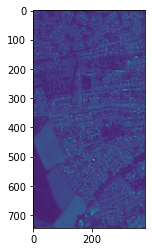

In [26]:
plt.imshow( data[ 0, :, :] )
plt.show()